<a href="https://colab.research.google.com/github/SargisGasparyan/MyRpojectN1/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv(r'/content/drive/My Drive/kc_house_data.csv',encoding='latin')
from sklearn import preprocessing

In [571]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



In [0]:
data=data.drop(columns=['id','date'])

In [0]:
data.bathrooms=data['bathrooms'].astype(int)
data.floors=data['floors'].astype(int)


In [574]:
data=data.loc[data.price<1750000]
data=data.loc[data.bedrooms<33]
data=data.loc[data.bathrooms<=6]
data=data.loc[data.sqft_living<=5000]
data=data.loc[data.sqft_lot<=120000]
data=data.loc[data.sqft_above<=6000]
data=data.loc[data.sqft_basement<=2000]
data=data.loc[data.sqft_living15<=5000]
data=data.loc[data.sqft_lot15<=100000]
data.shape

(20677, 19)

In [0]:
data.iloc[:, :-1] = preprocessing.scale(data.iloc[:, :-1])


In [0]:

# condition=data['condition'].value_counts()
# condition
# data['condition']=[0 if i == 3 else 1 for i in data['condition']]
# data['condition'].value_counts()

In [0]:
# yr_built=data['yr_built'].value_counts().head(20)
# data['yr_built']=[0 if i < 2000 else 1 for i in data['yr_built']]
# data['yr_built'].value_counts()

In [0]:
# data['yr_renovated']=[0 if i == 0 else 1 for i in data['yr_renovated']]
# data['yr_renovated'].value_counts()

In [0]:
# data.loc[data['zipcode'] <= 98024, 'zipcode'] = 0
# data.loc[((data['zipcode'] > 98024)&(data['zipcode'] <= 98045)), 'zipcode'] = 1
# data.loc[((data['zipcode'] > 98045)&(data['zipcode'] <= 98077)), 'zipcode'] = 2
# data.loc[((data['zipcode'] > 98077)&(data['zipcode'] <= 98119)), 'zipcode'] = 3
# data.loc[((data['zipcode'] > 98119)&(data['zipcode'] <= 98199)), 'zipcode'] = 4

In [0]:
# meted={3:0, 4:0,5:0,6:0,7:1,8:1,9:1,10:2,11:2,12:2}
# data['grade']=data['grade'].map(meted)
# data['grade'].value_counts()

In [0]:
# data['condition']=data['condition'].astype('str')
# data['yr_built']=data['yr_built'].astype('str')
# data['yr_renovated']=data['yr_renovated'].astype('str')
# data['zipcode']=data['zipcode'].astype('str')
# data['grade']=data['grade'].astype('str')

In [0]:
# x=pd.get_dummies(data[['condition','yr_built','yr_renovated','grade']])

In [0]:
# x

In [0]:
# data = data.join(x)


In [0]:
# data.drop(['condition','yr_built','yr_renovated','grade'], axis=1, inplace=True)

In [0]:
# data.T

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score,train_test_split



(trainData, 
 testData, 
 trainDependentVariables, 
 testDependentVariables) = train_test_split(data.drop('price', axis=1),
                                            data['price'],
                                            test_size=0.3, 
                                            random_state=5)

In [587]:
regressionModel = LinearRegression()
regressionModel.fit(trainData, trainDependentVariables)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
preds = regressionModel.predict(testData)

In [589]:
R2 = r2_score(y_pred=preds, 
                      y_true=testDependentVariables)
R2

0.7174401536303294

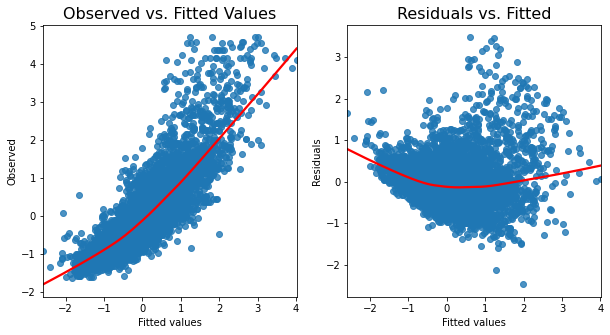

In [590]:
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
def linearity_test(model, y):  
    fitted_vals = model.predict(testData)
    resids = testDependentVariables-preds
    fig, ax = plt.subplots(1,2)
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Fitted Values', fontsize=16)
    ax[0].set(xlabel='Fitted values', ylabel='Observed')
    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Fitted', fontsize=16)
    ax[1].set(xlabel='Fitted values', ylabel='Residuals')
linearity_test(regressionModel, testDependentVariables)

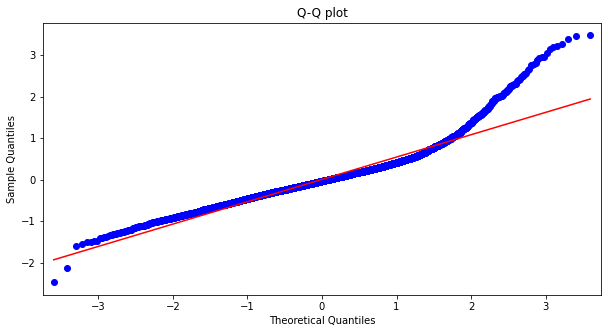

In [591]:
import statsmodels.api as sm 
import pylab as py 
sm.qqplot(testDependentVariables-preds,line='s') 
plt.title('Q-Q plot')
py.show()

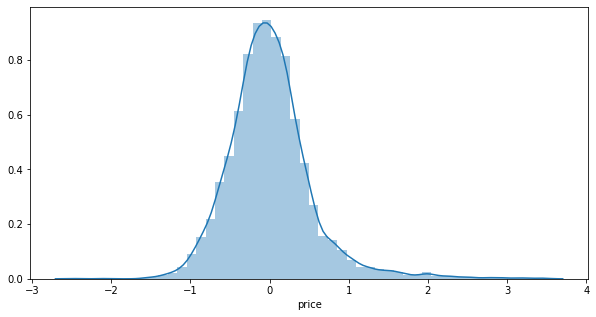

In [592]:
sns.distplot(testDependentVariables-preds)

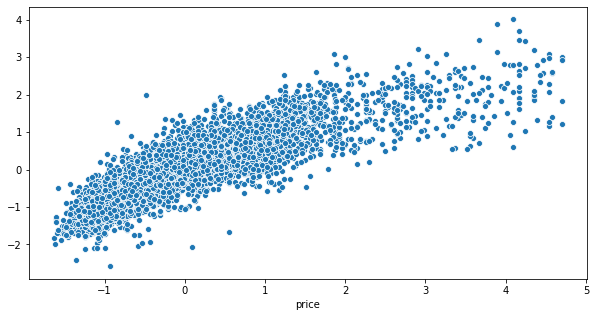

In [593]:
sns.scatterplot(testDependentVariables,preds)


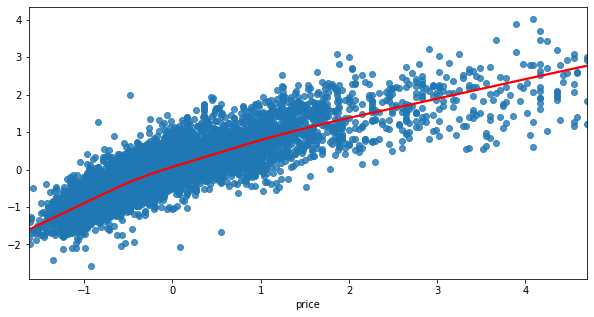

In [594]:
sns.regplot(x=testDependentVariables, y=preds, lowess=True, line_kws={'color': 'red'})


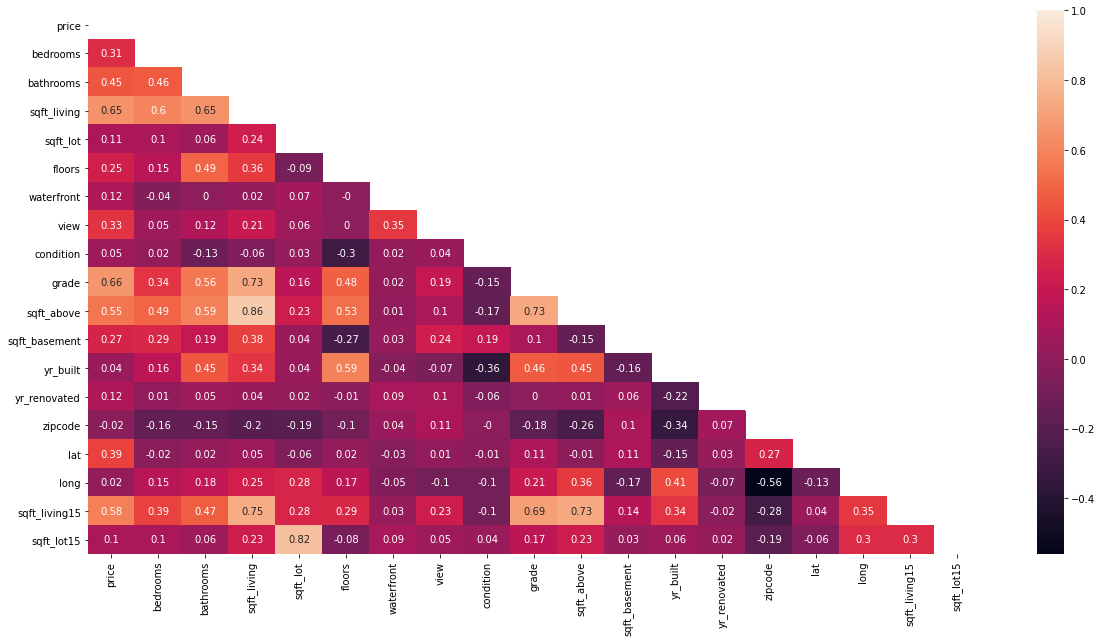

In [595]:

plt.figure(figsize=(20,10))
mask = np.zeros_like(data.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)]=True
sns.heatmap(round(data.corr(),2),annot=True,mask=mask)


In [0]:
data.drop(['sqft_above', 'sqft_living15','bathrooms'],axis=1, inplace=True)

In [597]:
(trainData, 
 testData, 
 trainDependentVariables, 
 testDependentVariables) = train_test_split(data.drop('price', axis=1),
                                            data['price'],
                                            test_size=0.3, 
                                            random_state=5)
print("train: %s\ntest: %s"%(trainData.shape, testData.shape))

train: (14473, 15)
test: (6204, 15)


In [598]:
regressionModel = LinearRegression()
regressionModel.fit(trainData, trainDependentVariables)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
preds = regressionModel.predict(testData)

In [0]:
mse = mean_squared_error(y_pred=preds,
                         y_true=testDependentVariables)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_pred=preds,
                          y_true=testDependentVariables)


R2 = r2_score(y_pred=preds, 
                      y_true=testDependentVariables)

R2_tr = r2_score(y_pred=regressionModel.predict(trainData), 
                      y_true=trainDependentVariables)

cv= cross_val_score(regressionModel,
                    data.drop('price', axis=1),
                    data['price'],
                    cv = 5).mean()

In [601]:
print("MSE:   {}\nRMSE:  {}\nR2:    {}\nR2 train:    {}\nMAE:   {}\n5-fold cv {}".format(mse, 
                                                                           rmse,
                                                                           R2,
                                                                           R2_tr,
                                                                           mae,
                                                                           cv))

MSE:   0.29528395900607546
RMSE:  0.5434003671383333
R2:    0.7117179533790636
R2 train:    0.6968515441430079
MAE:   0.3889459304375655
5-fold cv 0.69868869904025
